In [1]:
import numpy as np
import pandas as pd

c:\Users\SUNIL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.shape

(714, 3)

In [7]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [11]:
accuracy_score(y_pred, y_test)

0.6363636363636364

In [12]:
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

0.6288928012519561

In [13]:
kbin_age = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [14]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [28]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [44]:
X_train_trf[:]

array([[5., 5.],
       [4., 4.],
       [5., 5.],
       ...,
       [7., 9.],
       [6., 5.],
       [6., 2.]])

In [29]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [30]:
trf.named_transformers_['first'].bin_edges_[0].tolist()

[0.42, 14.0, 19.0, 22.0, 25.0, 28.5, 32.0, 36.0, 42.0, 50.0, 80.0]

In [45]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf' : X_train_trf[:,1]
})

In [46]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(x=X_train['Fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [47]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
155,51.0,9.0,61.3792,8.0,"(50.0, 80.0]","(51.479, 82.171]"
453,49.0,8.0,89.1042,9.0,"(42.0, 50.0]","(82.171, 512.329]"
742,21.0,2.0,262.3750,9.0,"(19.0, 22.0]","(82.171, 512.329]"
735,28.5,5.0,16.1000,5.0,"(25.0, 28.5]","(15.75, 26.0]"
37,21.0,2.0,8.0500,2.0,"(19.0, 22.0]","(7.896, 9.225]"


In [49]:
y_pred2 = clf.fit(X_train_trf, y_train).predict(X_test_trf)

In [50]:
accuracy_score(y_pred2, y_test)

0.6223776223776224

In [53]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(clf, X_trf, y, cv=10, scoring='accuracy'))

0.682140062597809

In [60]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(clf, X_trf, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title('After')
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title('After')
    plt.show()

0.682140062597809


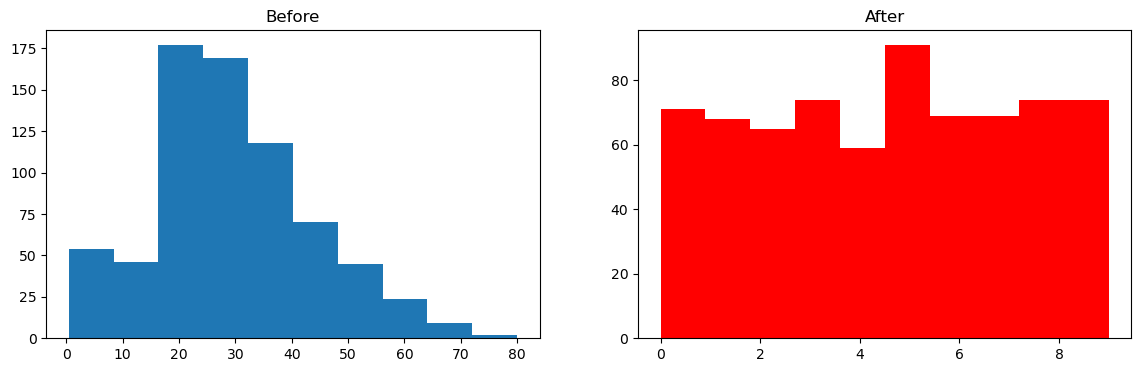

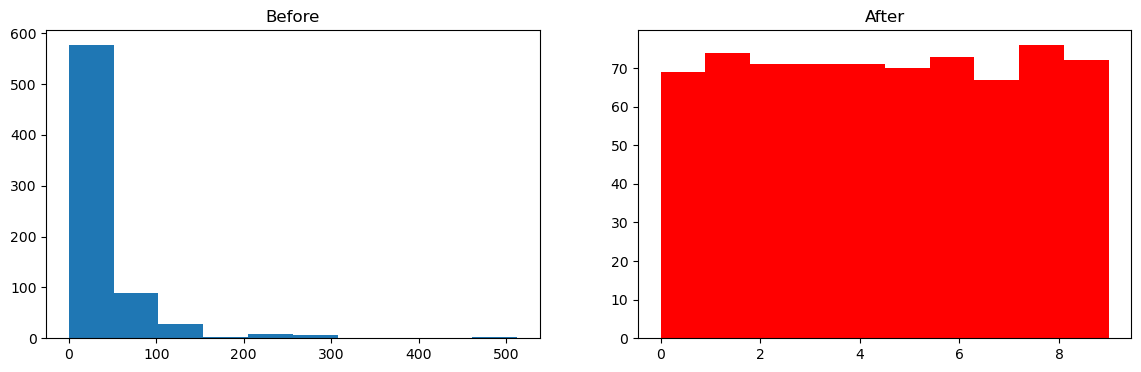

In [62]:
discretize(10, 'quantile')

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6864632237871675


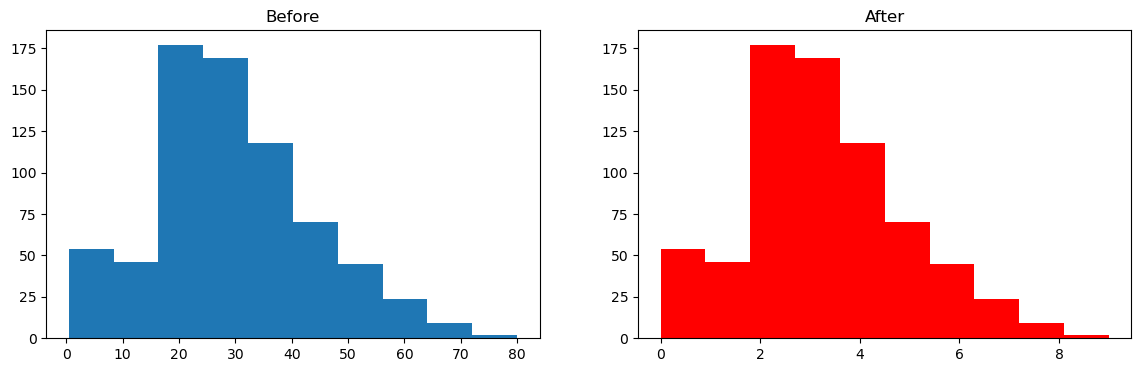

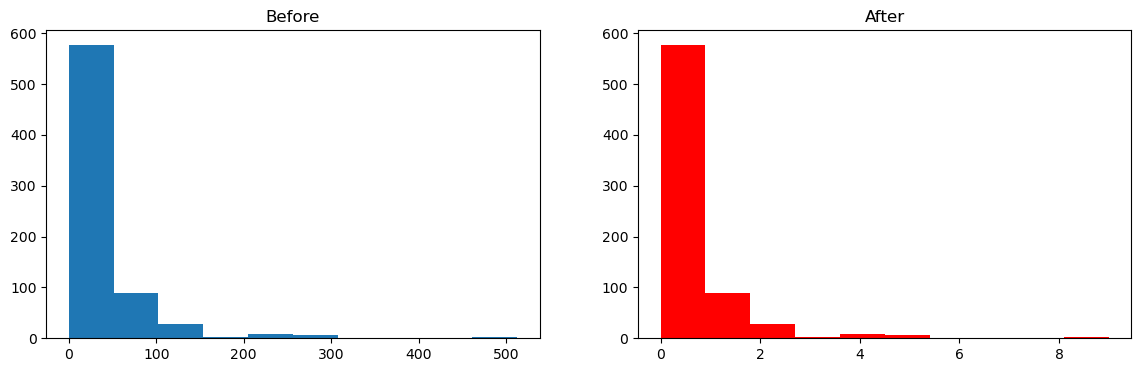

In [63]:
discretize(10, 'uniform')

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6655320813771518


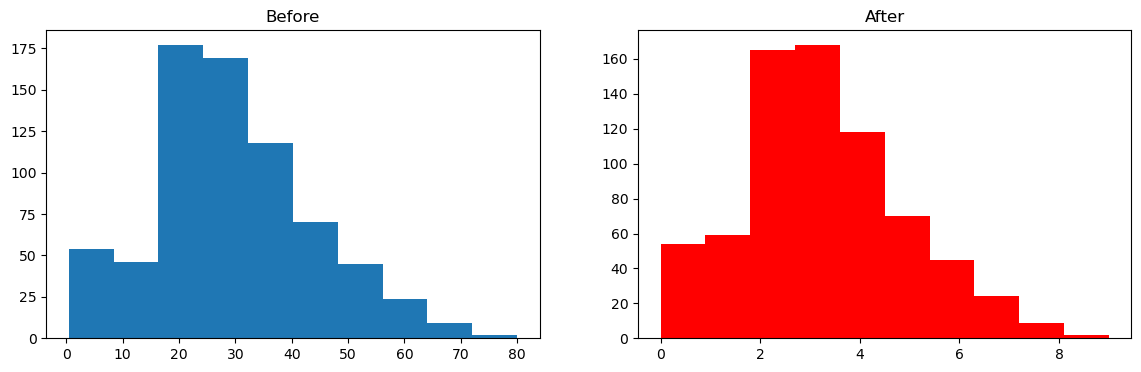

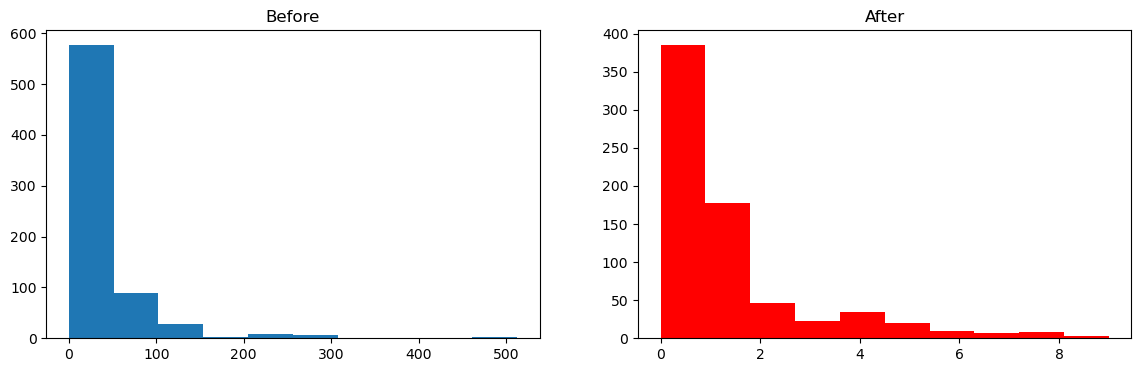

In [64]:
discretize(10, 'kmeans')